In [0]:
# install
!pip install pytorch-pretrained-bert pytorch-nlp

In [0]:
# BERT imports
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
# specify GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [0]:
n_gpu = torch.cuda.device_count()

In [0]:
# verify GPU availability
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from google.colab import files
uploaded = files.upload()

Saving new_data.csv to new_data.csv


In [85]:
df = pd.read_csv('new_data.csv')
df.head()

,Id,Enunciado,Tópico,Contexto,English
0,994,Meu primeiro programa\nEscreva um programa que...,Ambientação,Outros,"""My first show\nWrite a program that prints th..."
1,996,Impressão de caracteres na tela\nEscreva um pr...,Ambientação,Outros,\nScreen character printing\nWrite a program t...
2,999,Impressão de caracteres na tela (Bart Simpson)...,Ambientação,Outros,\nScreen Character Printing (Bart Simpson)\nWr...
3,1000,Operadores aritméticos\nQual o valor de X para...,Ambientação,Matemático,\nArithmetic Operators\nWhat is the value of X...
4,578,Operadores aritméticos \nQual o valor de Y par...,Ambientação,Matemático,\nArithmetic Operators\nWhat is the value of Y...


In [0]:
df.English = df.English.str.replace('\n', ' ')

In [0]:
X = df.English
y = df.Contexto

In [0]:
def transform(lista):
  retorno=[]
  for elemento in lista:
    if(elemento=='Bancário'):
      retorno+=[0]
    elif(elemento=='Comercial'):
      retorno+=[1]
    elif(elemento=='Computacional'):
      retorno+=[2]
    elif(elemento=='Consumo'):
      retorno+=[3]
    elif(elemento=='Data e hora'):
      retorno+=[4]
    elif(elemento=='Escolar'):
      retorno+=[5]
    elif(elemento=='Esporte'):
      retorno+=[6]
    elif(elemento=='Filmes e séries'):
      retorno+=[7]
    elif(elemento=='Física'):
      retorno+=[8]
    elif(elemento=='Geografia'):
      retorno+=[9]
    elif(elemento=='Imposto'):
      retorno+=[10]
    elif(elemento=='Jogos'):
      retorno+=[11]
    elif(elemento=='Matemático'):
      retorno+=[12]
    elif(elemento=='Meio ambiente'):
      retorno+=[13]
    elif(elemento=='Outros'):
      retorno+=[14]
    elif(elemento=='Pesquisa'):
      retorno+=[15]
    elif(elemento=='Pessoa'):
      retorno+=[16]
    elif(elemento=='População'):
      retorno+=[17]
    elif(elemento=='Produção'):
      retorno+=[18]
    elif(elemento=='Química'):
      retorno+=[19]
    elif(elemento=='RH'):
      retorno+=[20]
    elif(elemento=='Saúde'):
      retorno+=[21]
    elif(elemento=='Segurança'):
      retorno+=[22]
    elif(elemento=='Trânsito'):
      retorno+=[23]
  return retorno

def reverseTransform(lista):
  retorno=[]
  for elemento in lista:
    if(elemento==0):
      retorno+=['Bancário']
    elif(elemento==1):
      retorno+=['Comercial']
    elif(elemento==2):
      retorno+=['Computacional']
    elif(elemento==3):
      retorno+=['Consumo']
    elif(elemento==4):
      retorno+=['Data e hora']
    elif(elemento==5):
      retorno+=['Escolar']
    elif(elemento==6):
      retorno+=['Esporte']
    elif(elemento==7):
      retorno+=['Filmes e séries']
    elif(elemento==8):
      retorno+=['Física']
    elif(elemento==9):
      retorno+=['Geografia']
    elif(elemento==10):
      retorno+=['Imposto']
    elif(elemento==11):
      retorno+=['Jogos']
    elif(elemento==12):
      retorno+=['Matemático']
    elif(elemento==13):
      retorno+=['Meio ambiente']
    elif(elemento==14):
      retorno+=['Outros']
    elif(elemento==15):
      retorno+=['Pesquisa']
    elif(elemento==16):
      retorno+=['Pessoa']
    elif(elemento==17):
      retorno+=['População']
    elif(elemento==18):
      retorno+=['Produção']
    elif(elemento==19):
      retorno+=['Química']
    elif(elemento==20):
      retorno+=['RH']
    elif(elemento==21):
      retorno+=['Saúde']
    elif(elemento==22):
      retorno+=['Segurança']
    elif(elemento==23):
      retorno+=['Trânsito']
  return retorno

In [0]:
from sklearn.model_selection import StratifiedKFold
vetor_X_train=[]
vetor_y_train=[]
vetor_X_test=[]
vetor_y_test=[]
split = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
for train_index, val_index in split.split(X, y):
    vetor_X_train+=[X.iloc[train_index]]
    vetor_X_test+=[X.iloc[val_index]]
    vetor_y_train+=[y[train_index]]
    vetor_y_test+=[y[val_index]]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [0]:
contador=0
y_pred=[]
y_test=[]
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [0]:
torch.cuda.empty_cache()

In [86]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=y.shape[0])

model.cuda()


RuntimeError: ignored

In [0]:
contador=0
y_pred=[]
y_test=[]
while(contador<len(vetor_X_train)):
    query_data_train=vetor_X_train[contador]
    labels=vetor_y_train[contador]
    labels=transform(labels)
    query_data_test=vetor_X_test[contador]
    intent_data_label_test=vetor_y_test[contador]
    intent_data_label_test=transform(intent_data_label_test)

    sentences = ["[CLS] " + query + " [SEP]" for query in query_data_train]
    sentences2=["[CLS] " + query + " [SEP]" for query in query_data_test]
    
    # Tokenize with BERT tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

    tokenizer2 = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
    tokenized_texts2 = [tokenizer2.tokenize(sent) for sent in sentences2]
  
    # Set the maximum sequence length. 
    MAX_LEN = 128
    # Pad our input tokens
    train_inputs = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
    train_inputs = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    train_inputs = pad_sequences(train_inputs, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # Pad our input tokens
    validation_inputs = pad_sequences([tokenizer2.convert_tokens_to_ids(txt) for txt in tokenized_texts2],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
    validation_inputs = [tokenizer2.convert_tokens_to_ids(x) for x in tokenized_texts2]
    validation_inputs = pad_sequences(validation_inputs, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # # Create attention masks
    attention_masks = []
    # Create a mask of 1s for each token followed by 0s for padding
    for seq in train_inputs:
      seq_mask = [float(i>0) for i in seq]
      attention_masks.append(seq_mask)

    attention_masks2 = []
    # Create a mask of 1s for each token followed by 0s for padding
    for seq in validation_inputs:
      seq_mask = [float(i>0) for i in seq]
      attention_masks2.append(seq_mask)


    # # Use train_test_split to split our data into train and validation sets for training
    # train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
    #                                                             random_state=2018, test_size=0.1)
    # train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
    #                                             random_state=2018, test_size=0.1)

    # # Convert all of our data into torch tensors, the required datatype for our model
    train_inputs = torch.tensor(train_inputs)
    validation_inputs = torch.tensor(validation_inputs)
    train_labels = torch.tensor(labels)
    validation_labels = torch.tensor(intent_data_label_test)
    train_masks = torch.tensor(attention_masks)
    validation_masks = torch.tensor(attention_masks2)

    # Select a batch size for training. 
    batch_size = 32

    # Create an iterator of our data with torch DataLoader 
    train_data = TensorDataset(train_inputs, train_masks, train_labels)
    train_sampler = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
    validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
    validation_sampler = SequentialSampler(validation_data)
    validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=y.shape[0])
    model.cuda()

    # BERT fine-tuning parameters
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
        'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
        'weight_decay_rate': 0.0}
    ]

    optimizer = BertAdam(optimizer_grouped_parameters,
                        lr=2e-5,
                        warmup=.1)

      
    # Store our loss and accuracy for plotting
    train_loss_set = []
    # Number of training epochs 
    epochs = 4

    # BERT training loop
    for _ in trange(epochs, desc="Epoch"):  
      
      ## TRAINING
      
      # Set our model to training mode
      model.train()  
      # Tracking variables
      tr_loss = 0
      nb_tr_examples, nb_tr_steps = 0, 0
      # Train the data for one epoch
      for step, batch in enumerate(train_dataloader):
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()
        # Forward pass
        loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        train_loss_set.append(loss.item())    
        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # Update tracking variables
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1
      print("Train loss: {}".format(tr_loss/nb_tr_steps))
          
      ## VALIDATION

      # Put model in evaluation mode
      model.eval()
      # Tracking variables 
      eval_loss, eval_accuracy = 0, 0
      nb_eval_steps, nb_eval_examples = 0, 0
      # Evaluate data for one epoch
      for batch in validation_dataloader:
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
          # Forward pass, calculate logit predictions
          logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)    
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1
      print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

    # plot training performance
    plt.figure(figsize=(15,8))
    plt.title("Training loss")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.plot(train_loss_set)
    plt.show()

    # load test data
    sentences = ["[CLS] " + query + " [SEP]" for query in query_data_test]
    labels = intent_data_label_test

    # tokenize test data
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
    MAX_LEN = 128
    # Pad our input tokens
    input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Create attention masks
    attention_masks = []
    # Create a mask of 1s for each token followed by 0s for padding
    for seq in input_ids:
      seq_mask = [float(i>0) for i in seq]
      attention_masks.append(seq_mask) 

    # create test tensors
    prediction_inputs = torch.tensor(input_ids)
    prediction_masks = torch.tensor(attention_masks)
    prediction_labels = torch.tensor(labels)
    batch_size = 32  
    prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
    prediction_sampler = SequentialSampler(prediction_data)
    prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

    ## Prediction on test set
    # Put model in evaluation mode
    model.eval()
    # Tracking variables 
    predictions , true_labels = [], []
    # Predict 
    for batch in prediction_dataloader:
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels = batch
      # Telling the model not to compute or store gradients, saving memory and speeding up prediction
      with torch.no_grad():
        # Forward pass, calculate logit predictions
        logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()  
      # Store predictions and true labels
      predictions.append(logits)
      true_labels.append(label_ids)
      
    # Import and evaluate each test batch using Matthew's correlation coefficient
    from sklearn.metrics import matthews_corrcoef
    matthews_set = []
    for i in range(len(true_labels)):
      matthews = matthews_corrcoef(true_labels[i],
                    np.argmax(predictions[i], axis=1).flatten())
      matthews_set.append(matthews)
      
    # Flatten the predictions and true values for aggregate Matthew's evaluation on the whole dataset
    flat_predictions = [item for sublist in predictions for item in sublist]
    flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
    flat_true_labels = [item for sublist in true_labels for item in sublist]

    y_pred+=[flat_predictions]
    y_test+=[flat_true_labels]
        


    contador+=1

100%|██████████| 407873900/407873900 [00:10<00:00, 37618692.43B/s]
t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]


RuntimeError: ignored

In [0]:
aux=[]
for elemento in y_pred:
  for cada in elemento:
    aux+=[cada]
y_pred=aux

In [0]:
aux=[]
for elemento in y_test:
  for cada in elemento:
    aux+=[cada]
y_test=aux

In [0]:
y_test=reverseTransform(y_test)
y_pred=reverseTransform(y_pred)

In [0]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#, target_names=target_names))

ValueError: ignored

In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8794258373205741

In [0]:
from google.colab import files
uploaded = files.upload()

Saving arq.txt to arq (1).txt


In [0]:
def get_new_sentences(da):
    strings=[]
    for elemento in da['English']:
        if(len(da)+len(strings)<maximum):
            contador=0
            lista=elemento.split()
            while(contador<len(lista)):
                if(lista[contador] in synonyms_lexicon):
                    lista[contador]=synonyms_lexicon[lista[contador]][0]
                contador+=1
            strings+=[' '.join(lista)]
        else:
            break

    new_sentences = pd.Series(strings)
    return new_sentences

def get_synonyms_lexicon(path):
    synonyms_lexicon = {}
    text_entries = [l.strip() for l in open(path).readlines()]
    for e in text_entries:
        e = e.split(' ')
        k = e[0]
        v = e[1:len(e)]
        synonyms_lexicon[k] = v
    return synonyms_lexicon

synonyms_lexicon = get_synonyms_lexicon('arq.txt')

In [0]:
from sklearn.model_selection import StratifiedKFold
vetor_X_train=[]
vetor_y_train=[]
vetor_X_test=[]
vetor_y_test=[]
split = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
for train_index, val_index in split.split(X, y):
    vetor_X_train+=[X.iloc[train_index]]
    vetor_X_test+=[X.iloc[val_index]]
    vetor_y_train+=[y[train_index]]
    vetor_y_test+=[y[val_index]]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.047019454149099


Epoch:  25%|██▌       | 1/4 [00:46<02:19, 46.64s/it]

Validation Accuracy: 0.5138888888888888
Train loss: 1.7661330791620107


Epoch:  50%|█████     | 2/4 [01:31<01:32, 46.19s/it]

Validation Accuracy: 0.8081597222222222
Train loss: 0.8471137864085344


Epoch:  75%|███████▌  | 3/4 [02:17<00:46, 46.08s/it]

Validation Accuracy: 0.8984375
Train loss: 0.4112225507314389


Epoch: 100%|██████████| 4/4 [03:03<00:00, 45.92s/it]

Validation Accuracy: 0.921875


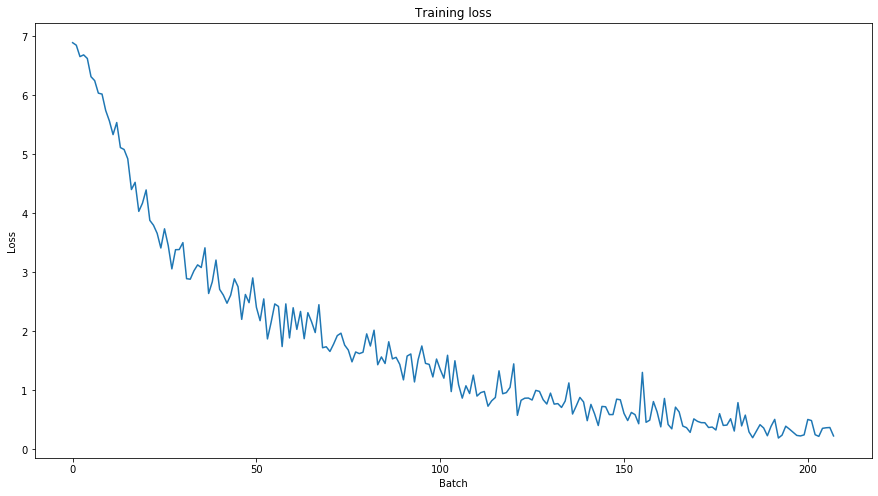

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.0989667062576


Epoch:  25%|██▌       | 1/4 [00:46<02:18, 46.17s/it]

Validation Accuracy: 0.5373263888888888
Train loss: 1.718170023881472


Epoch:  50%|█████     | 2/4 [01:31<01:31, 45.96s/it]

Validation Accuracy: 0.796875
Train loss: 0.9438589519033065


Epoch:  75%|███████▌  | 3/4 [02:17<00:45, 45.90s/it]

Validation Accuracy: 0.890625
Train loss: 0.48718525813176083


Epoch: 100%|██████████| 4/4 [03:02<00:00, 45.78s/it]

Validation Accuracy: 0.9140625


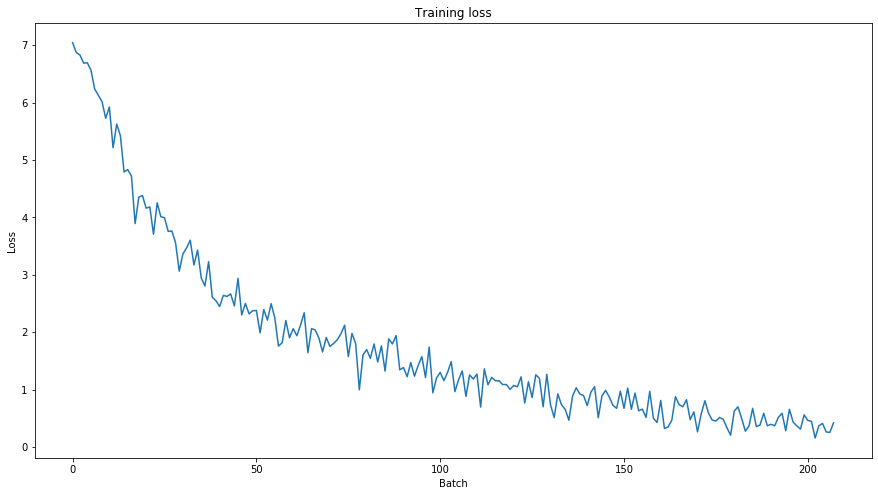

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 3.9499118213470163


Epoch:  25%|██▌       | 1/4 [00:46<02:18, 46.15s/it]

Validation Accuracy: 0.5694444444444444
Train loss: 1.4608215884520457


Epoch:  50%|█████     | 2/4 [01:31<01:31, 45.90s/it]

Validation Accuracy: 0.859375
Train loss: 0.6007685836118001


Epoch:  75%|███████▌  | 3/4 [02:17<00:45, 45.85s/it]

Validation Accuracy: 0.9296875
Train loss: 0.3022765697768101


Epoch: 100%|██████████| 4/4 [03:02<00:00, 45.76s/it]

Validation Accuracy: 0.921875


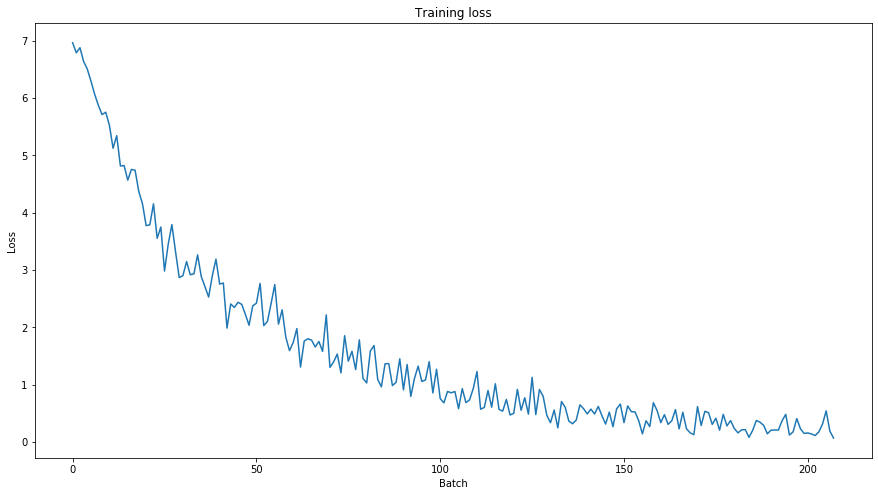

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 3.907319554915795


Epoch:  25%|██▌       | 1/4 [00:46<02:18, 46.07s/it]

Validation Accuracy: 0.5885416666666666
Train loss: 1.441303246296369


Epoch:  50%|█████     | 2/4 [01:31<01:31, 45.87s/it]

Validation Accuracy: 0.8394097222222222
Train loss: 0.6646097121903529


Epoch:  75%|███████▌  | 3/4 [02:17<00:45, 45.84s/it]

Validation Accuracy: 0.8862847222222222
Train loss: 0.3234221132901999


Epoch: 100%|██████████| 4/4 [03:02<00:00, 45.80s/it]

Validation Accuracy: 0.9019097222222222


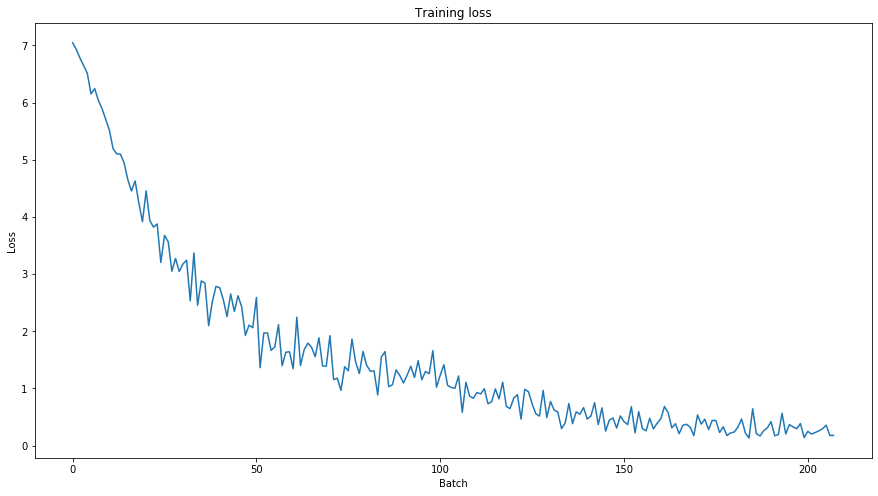

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 3.9079248951031613


Epoch:  25%|██▌       | 1/4 [00:46<02:18, 46.03s/it]

Validation Accuracy: 0.4505208333333333
Train loss: 1.8718253259475415


Epoch:  50%|█████     | 2/4 [01:31<01:31, 45.84s/it]

Validation Accuracy: 0.7960069444444444
Train loss: 0.8802056066118754


Epoch:  75%|███████▌  | 3/4 [02:17<00:45, 45.80s/it]

Validation Accuracy: 0.8663194444444444
Train loss: 0.39370536918823534


Epoch: 100%|██████████| 4/4 [03:02<00:00, 45.71s/it]

Validation Accuracy: 0.9375


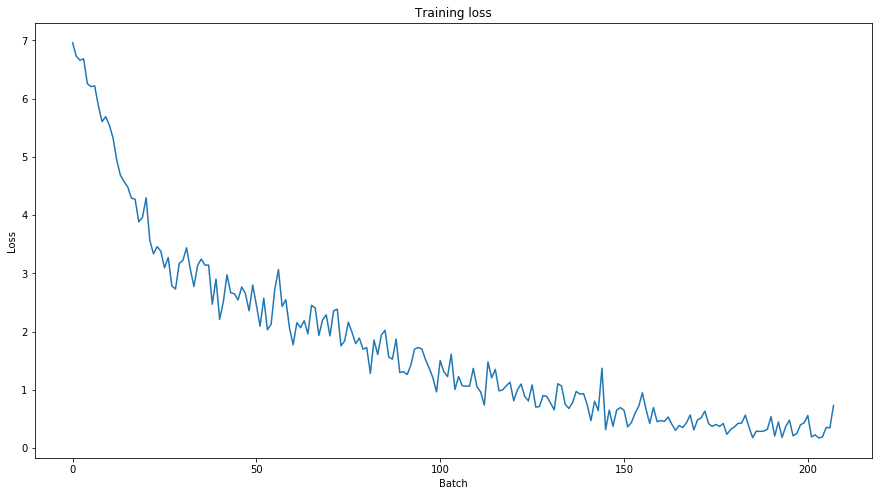

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 3.903862265440134


Epoch:  25%|██▌       | 1/4 [00:46<02:18, 46.11s/it]

Validation Accuracy: 0.5625
Train loss: 1.3013676496652455


Epoch:  50%|█████     | 2/4 [01:31<01:31, 45.93s/it]

Validation Accuracy: 0.859375
Train loss: 0.5788491494380511


Epoch:  75%|███████▌  | 3/4 [02:17<00:45, 45.90s/it]

Validation Accuracy: 0.8671875
Train loss: 0.3107321821153164


Epoch: 100%|██████████| 4/4 [03:03<00:00, 45.82s/it]

Validation Accuracy: 0.90625


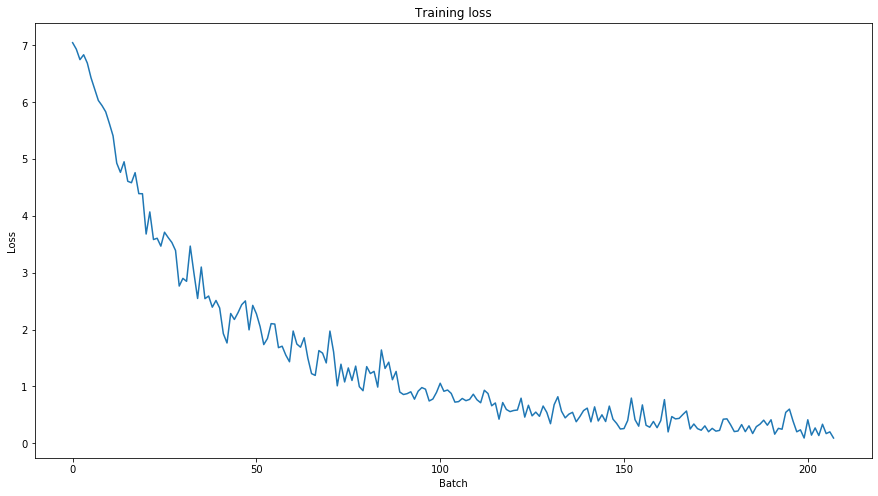

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 3.899513597671802


Epoch:  25%|██▌       | 1/4 [00:46<02:18, 46.30s/it]

Validation Accuracy: 0.6796875
Train loss: 1.3216244326188014


Epoch:  50%|█████     | 2/4 [01:31<01:32, 46.03s/it]

Validation Accuracy: 0.921875
Train loss: 0.5776879859085267


Epoch:  75%|███████▌  | 3/4 [02:17<00:45, 45.98s/it]

Validation Accuracy: 0.9453125
Train loss: 0.26577467671953714


Epoch: 100%|██████████| 4/4 [03:03<00:00, 45.87s/it]

Validation Accuracy: 0.953125


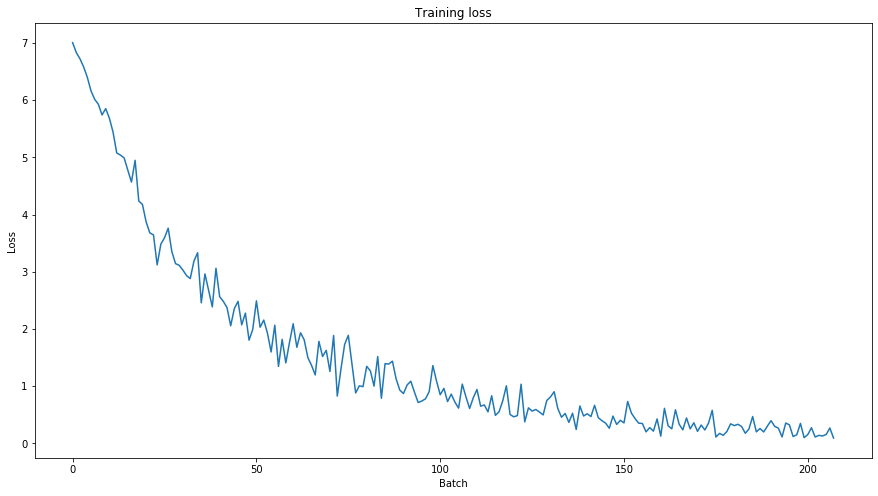

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 3.7448583268202267


Epoch:  25%|██▌       | 1/4 [00:46<02:18, 46.17s/it]

Validation Accuracy: 0.625
Train loss: 1.1849556553822298


Epoch:  50%|█████     | 2/4 [01:31<01:31, 45.97s/it]

Validation Accuracy: 0.8046875
Train loss: 0.4873293818762669


Epoch:  75%|███████▌  | 3/4 [02:17<00:45, 45.92s/it]

Validation Accuracy: 0.9375
Train loss: 0.23578438764581314


Epoch: 100%|██████████| 4/4 [03:03<00:00, 45.84s/it]

Validation Accuracy: 0.921875


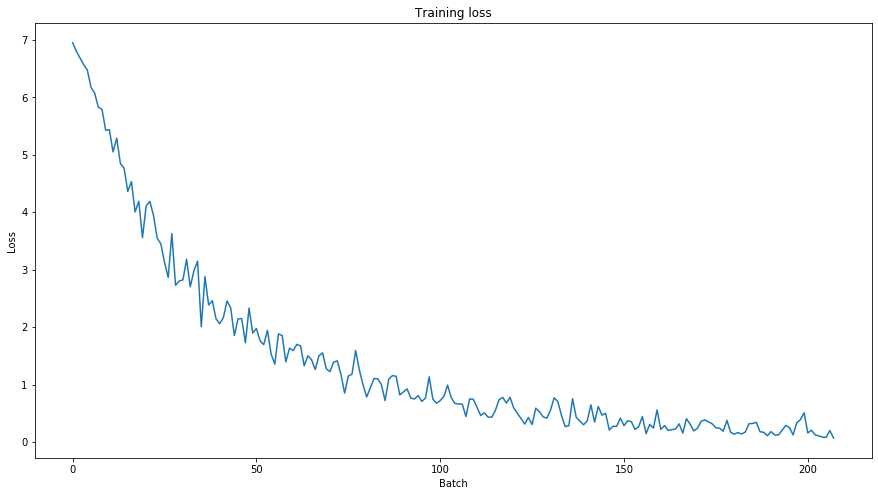

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.087413430213928


Epoch:  25%|██▌       | 1/4 [00:46<02:18, 46.23s/it]

Validation Accuracy: 0.4921875
Train loss: 1.5817378289424455


Epoch:  50%|█████     | 2/4 [01:31<01:31, 45.99s/it]

Validation Accuracy: 0.8515625
Train loss: 0.6919702423306612


Epoch:  75%|███████▌  | 3/4 [02:17<00:45, 45.94s/it]

Validation Accuracy: 0.890625
Train loss: 0.31088073981496006


Epoch: 100%|██████████| 4/4 [03:03<00:00, 45.84s/it]

Validation Accuracy: 0.8984375


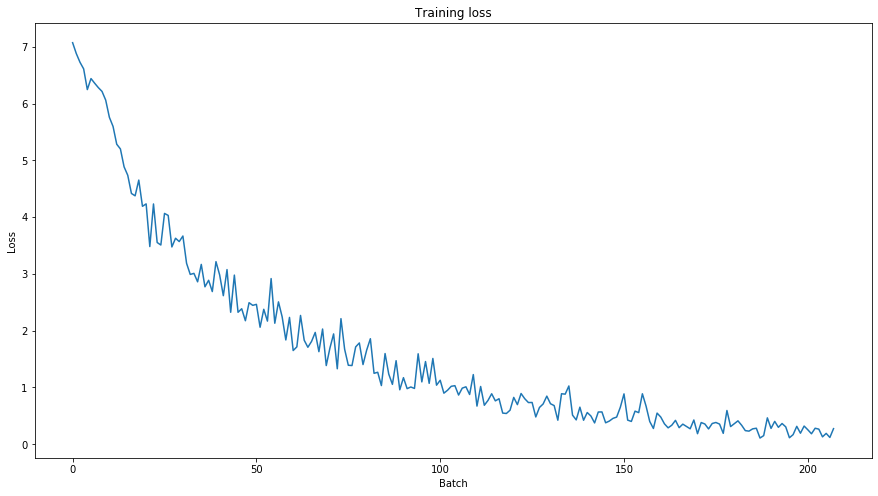

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.175386016185467


Epoch:  25%|██▌       | 1/4 [00:46<02:18, 46.07s/it]

Validation Accuracy: 0.375
Train loss: 2.2923063383652615


Epoch:  50%|█████     | 2/4 [01:31<01:31, 45.92s/it]

Validation Accuracy: 0.6171875
Train loss: 1.4961674981392348


Epoch:  75%|███████▌  | 3/4 [02:17<00:45, 45.89s/it]

Validation Accuracy: 0.7578125
Train loss: 0.8244519520264405


Epoch: 100%|██████████| 4/4 [03:03<00:00, 45.83s/it]

Validation Accuracy: 0.8828125


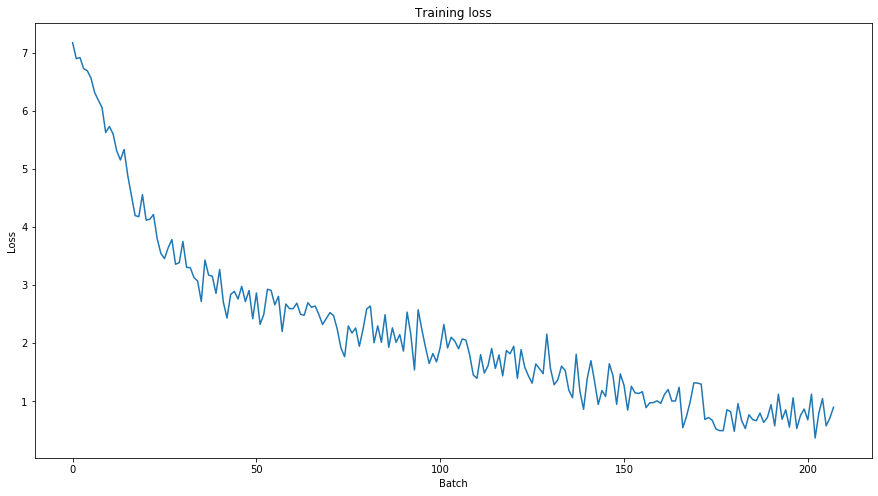

In [0]:
contador=0
y_pred=[]
y_test=[]
while(contador<len(vetor_X_train)):
    
    query_data_test=vetor_X_test[contador]
    intent_data_label_test=vetor_y_test[contador]
    intent_data_label_test=transform(intent_data_label_test)
    

    X_train=vetor_X_train[contador]
    y_train=vetor_y_train[contador]
    test = np.c_[X_train[:np.newaxis], y_train[:np.newaxis]]
    df = pd.DataFrame(test, columns=['English', 'Contexto'])
    
    maximum = df.Contexto.value_counts().max()
    g = df.groupby('Contexto')


    mat = g.get_group('Matemático')
    comercial = g.get_group('Comercial')
    jogos = g.get_group('Jogos')
    escolar = g.get_group('Escolar')
    outros = g.get_group('Outros')
    transito = g.get_group('Trânsito')
    esporte = g.get_group('Esporte')
    fisica = g.get_group('Física')
    bancario = g.get_group('Bancário')
    RH = g.get_group('RH')
    f_s = g.get_group('Filmes e séries')
    populacao = g.get_group('População')
    quimica = g.get_group('Química')
    pessoa = g.get_group('Pessoa')
    d_h = g.get_group('Data e hora')
    seguranca = g.get_group('Segurança')
    ambiente = g.get_group('Meio ambiente')
    pesquisa = g.get_group('Pesquisa')
    saude = g.get_group('Saúde')
    consumo = g.get_group('Consumo')
    geografia = g.get_group('Geografia')
    producao = g.get_group('Produção')
    imposto = g.get_group('Imposto')
    computacional = g.get_group('Computacional')
    
    new_jogos = get_new_sentences(jogos)
    new_comercial = get_new_sentences(comercial)
    new_escolar = get_new_sentences(escolar)
    new_outros = get_new_sentences(outros)
    new_transito = get_new_sentences(transito)
    new_esporte = get_new_sentences(esporte)
    new_fisica = get_new_sentences(fisica)
    new_bancario = get_new_sentences(bancario)
    new_RH = get_new_sentences(RH)
    new_f_s = get_new_sentences(f_s)
    new_populacao = get_new_sentences(populacao)
    new_quimica = get_new_sentences(quimica)
    new_pessoa = get_new_sentences(pessoa)
    new_d_h = get_new_sentences(d_h)
    new_seguranca = get_new_sentences(seguranca)
    new_pesquisa = get_new_sentences(pesquisa)
    new_ambiente = get_new_sentences(ambiente)
    new_saude = get_new_sentences(saude)
    new_consumo = get_new_sentences(consumo)
    new_geografia = get_new_sentences(geografia)
    new_producao = get_new_sentences(producao)
    new_computacional = get_new_sentences(computacional)
    new_imposto = get_new_sentences(imposto)

    
    new_jogos = pd.DataFrame(new_jogos,columns=['English'])
    new_jogos['Contexto'] = 'Jogos'

    new_comercial = pd.DataFrame(new_comercial,columns=['English'])
    new_comercial['Contexto'] = 'Comercial'

    new_escolar = pd.DataFrame(new_escolar,columns=['English'])
    new_escolar['Contexto'] = 'Escolar'

    new_outros = pd.DataFrame(new_outros,columns=['English'])
    new_outros['Contexto'] = 'Outros'

    new_transito = pd.DataFrame(new_transito,columns=['English'])
    new_transito['Contexto'] = 'Trânsito'

    new_esporte = pd.DataFrame(new_esporte,columns=['English'])
    new_esporte['Contexto'] = 'Esporte'

    new_fisica = pd.DataFrame(new_fisica,columns=['English'])
    new_fisica['Contexto'] = 'Física'

    new_bancario = pd.DataFrame(new_bancario,columns=['English'])
    new_bancario['Contexto'] = 'Bancário'

    new_RH = pd.DataFrame(new_RH,columns=['English'])
    new_RH['Contexto'] = 'RH'

    new_f_s = pd.DataFrame(new_f_s,columns=['English'])
    new_f_s['Contexto'] = 'Filmes e séries'

    new_populacao = pd.DataFrame(new_populacao,columns=['English'])
    new_populacao['Contexto'] = 'População'

    new_quimica = pd.DataFrame(new_quimica,columns=['English'])
    new_quimica['Contexto'] = 'Química'

    new_pessoa = pd.DataFrame(new_pessoa,columns=['English'])
    new_pessoa['Contexto'] = 'Pessoa'

    new_d_h = pd.DataFrame(new_d_h,columns=['English'])
    new_d_h['Contexto'] = 'Data e hora'

    new_seguranca = pd.DataFrame(new_seguranca,columns=['English'])
    new_seguranca['Contexto'] = 'Segurança'

    new_pesquisa = pd.DataFrame(new_pesquisa,columns=['English'])
    new_pesquisa['Contexto'] = 'Pesquisa'

    new_ambiente = pd.DataFrame(new_ambiente,columns=['English'])
    new_ambiente['Contexto'] = 'Meio ambiente'

    new_saude = pd.DataFrame(new_saude,columns=['English'])
    new_saude['Contexto'] = 'Saúde'

    new_consumo = pd.DataFrame(new_consumo,columns=['English'])
    new_consumo['Contexto'] = 'Consumo'

    new_geografia = pd.DataFrame(new_geografia,columns=['English'])
    new_geografia['Contexto'] = 'Geografia'

    new_producao = pd.DataFrame(new_producao,columns=['English'])
    new_producao['Contexto'] = 'Produção'

    new_computacional= pd.DataFrame(new_computacional,columns=['English'])
    new_computacional['Contexto'] = 'Computacional'

    new_imposto= pd.DataFrame(new_imposto,columns=['English'])
    new_imposto['Contexto'] = 'Imposto'
    
    jogos_extended = pd.concat([jogos, new_jogos], keys = ['English', 'Contexto'])
    comercial_extended = pd.concat([comercial, new_comercial], keys = ['English', 'Contexto'])
    escolar_extended = pd.concat([escolar, new_escolar], keys = ['English', 'Contexto'])
    outros_extended = pd.concat([outros, new_outros], keys = ['English', 'Contexto'])
    transito_extended = pd.concat([transito, new_transito], keys = ['English', 'Contexto'])
    esporte_extended = pd.concat([esporte, new_esporte], keys = ['English', 'Contexto'])
    fisica_extended = pd.concat([fisica, new_fisica], keys = ['English', 'Contexto'])
    bancario_extended = pd.concat([bancario, new_bancario], keys = ['English', 'Contexto'])
    RH_extended = pd.concat([RH, new_RH], keys = ['English', 'Contexto'])
    f_s_extended = pd.concat([f_s, new_f_s], keys = ['English', 'Contexto'])
    populacao_extended = pd.concat([populacao, new_populacao], keys = ['English', 'Contexto'])
    quimica_extended = pd.concat([quimica, new_quimica], keys = ['English', 'Contexto'])
    pessoa_extended = pd.concat([pessoa, new_pessoa], keys = ['English', 'Contexto'])
    d_h_extended = pd.concat([d_h, new_d_h], keys = ['English', 'Contexto'])
    seguranca_extended = pd.concat([seguranca, new_seguranca], keys = ['English', 'Contexto'])
    pesquisa_extended = pd.concat([pesquisa, new_pesquisa], keys = ['English', 'Contexto'])
    ambiente_extended = pd.concat([ambiente, new_ambiente], keys = ['English', 'Contexto'])
    saude_extended = pd.concat([saude, new_saude], keys = ['English', 'Contexto'])
    consumo_extended = pd.concat([consumo, new_consumo], keys = ['English', 'Contexto'])
    geografia_extended = pd.concat([geografia, new_geografia], keys = ['English', 'Contexto'])
    producao_extended = pd.concat([producao, new_producao], keys = ['English', 'Contexto'])
    computacional_extended = pd.concat([computacional, new_computacional], keys = ['English', 'Contexto'])
    imposto_extended = pd.concat([imposto, new_imposto], keys = ['English', 'Contexto'])
    
    df = pd.concat([mat, jogos_extended,comercial_extended,escolar_extended,outros_extended,
               transito_extended,esporte_extended,fisica_extended,bancario_extended,
               RH_extended,f_s_extended,populacao_extended,quimica_extended,
               pessoa_extended,d_h_extended,seguranca_extended,pesquisa_extended,
               ambiente_extended,saude_extended,consumo_extended,geografia_extended,
               producao_extended,computacional_extended,imposto_extended])
    
    X_train = df['English']
    y_train = df['Contexto']
    
    query_data_train=X_train
    labels=y_train
    labels=transform(labels)
   

    sentences = ["[CLS] " + query + " [SEP]" for query in query_data_train]
    sentences2=["[CLS] " + query + " [SEP]" for query in query_data_test]
    
    # Tokenize with BERT tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

    tokenizer2 = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
    tokenized_texts2 = [tokenizer2.tokenize(sent) for sent in sentences2]
  
    # Set the maximum sequence length. 
    MAX_LEN = 128
    # Pad our input tokens
    train_inputs = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
    train_inputs = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    train_inputs = pad_sequences(train_inputs, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # Pad our input tokens
    validation_inputs = pad_sequences([tokenizer2.convert_tokens_to_ids(txt) for txt in tokenized_texts2],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
    validation_inputs = [tokenizer2.convert_tokens_to_ids(x) for x in tokenized_texts2]
    validation_inputs = pad_sequences(validation_inputs, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # # Create attention masks
    attention_masks = []
    # Create a mask of 1s for each token followed by 0s for padding
    for seq in train_inputs:
      seq_mask = [float(i>0) for i in seq]
      attention_masks.append(seq_mask)

    attention_masks2 = []
    # Create a mask of 1s for each token followed by 0s for padding
    for seq in validation_inputs:
      seq_mask = [float(i>0) for i in seq]
      attention_masks2.append(seq_mask)


    # # Use train_test_split to split our data into train and validation sets for training
    # train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
    #                                                             random_state=2018, test_size=0.1)
    # train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
    #                                             random_state=2018, test_size=0.1)

    # # Convert all of our data into torch tensors, the required datatype for our model
    train_inputs = torch.tensor(train_inputs)
    validation_inputs = torch.tensor(validation_inputs)
    train_labels = torch.tensor(labels)
    validation_labels = torch.tensor(intent_data_label_test)
    train_masks = torch.tensor(attention_masks)
    validation_masks = torch.tensor(attention_masks2)

    # Select a batch size for training. 
    batch_size = 32

    # Create an iterator of our data with torch DataLoader 
    train_data = TensorDataset(train_inputs, train_masks, train_labels)
    train_sampler = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
    validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
    validation_sampler = SequentialSampler(validation_data)
    validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=y.shape[0])
    model.cuda()

    # BERT fine-tuning parameters
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
        'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
        'weight_decay_rate': 0.0}
    ]

    optimizer = BertAdam(optimizer_grouped_parameters,
                        lr=2e-5,
                        warmup=.1)

      
    # Store our loss and accuracy for plotting
    train_loss_set = []
    # Number of training epochs 
    epochs = 4

    # BERT training loop
    for _ in trange(epochs, desc="Epoch"):  
      
      ## TRAINING
      
      # Set our model to training mode
      model.train()  
      # Tracking variables
      tr_loss = 0
      nb_tr_examples, nb_tr_steps = 0, 0
      # Train the data for one epoch
      for step, batch in enumerate(train_dataloader):
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()
        # Forward pass
        loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        train_loss_set.append(loss.item())    
        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # Update tracking variables
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1
      print("Train loss: {}".format(tr_loss/nb_tr_steps))
          
      ## VALIDATION

      # Put model in evaluation mode
      model.eval()
      # Tracking variables 
      eval_loss, eval_accuracy = 0, 0
      nb_eval_steps, nb_eval_examples = 0, 0
      # Evaluate data for one epoch
      for batch in validation_dataloader:
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
          # Forward pass, calculate logit predictions
          logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)    
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1
      print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

    # plot training performance
    plt.figure(figsize=(15,8))
    plt.title("Training loss")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.plot(train_loss_set)
    plt.show()

    # load test data
    sentences = ["[CLS] " + query + " [SEP]" for query in query_data_test]
    labels = intent_data_label_test

    # tokenize test data
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
    MAX_LEN = 128
    # Pad our input tokens
    input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Create attention masks
    attention_masks = []
    # Create a mask of 1s for each token followed by 0s for padding
    for seq in input_ids:
      seq_mask = [float(i>0) for i in seq]
      attention_masks.append(seq_mask) 

    # create test tensors
    prediction_inputs = torch.tensor(input_ids)
    prediction_masks = torch.tensor(attention_masks)
    prediction_labels = torch.tensor(labels)
    batch_size = 32  
    prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
    prediction_sampler = SequentialSampler(prediction_data)
    prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

    ## Prediction on test set
    # Put model in evaluation mode
    model.eval()
    # Tracking variables 
    predictions , true_labels = [], []
    # Predict 
    for batch in prediction_dataloader:
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels = batch
      # Telling the model not to compute or store gradients, saving memory and speeding up prediction
      with torch.no_grad():
        # Forward pass, calculate logit predictions
        logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()  
      # Store predictions and true labels
      predictions.append(logits)
      true_labels.append(label_ids)
      
    # Import and evaluate each test batch using Matthew's correlation coefficient
    from sklearn.metrics import matthews_corrcoef
    matthews_set = []
    for i in range(len(true_labels)):
      matthews = matthews_corrcoef(true_labels[i],
                    np.argmax(predictions[i], axis=1).flatten())
      matthews_set.append(matthews)
      
    # Flatten the predictions and true values for aggregate Matthew's evaluation on the whole dataset
    flat_predictions = [item for sublist in predictions for item in sublist]
    flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
    flat_true_labels = [item for sublist in true_labels for item in sublist]

    y_pred+=[flat_predictions]
    y_test+=[flat_true_labels]
        


    contador+=1

In [0]:
aux=[]
for elemento in y_pred:
  for cada in elemento:
    aux+=[cada]
y_pred=aux

In [0]:
aux=[]
for elemento in y_test:
  for cada in elemento:
    aux+=[cada]
y_test=aux

In [0]:
print(classification_report(y_pred, y_test))#, target_names=target_names))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.87      0.87      0.87       120
           2       0.00      0.00      0.00         0
           3       0.94      0.79      0.86        19
           4       0.62      0.68      0.65        19
           5       1.00      0.95      0.98        83
           6       0.98      1.00      0.99        41
           7       0.97      0.85      0.91        34
           8       0.89      0.86      0.88        37
           9       0.36      0.67      0.47         6
          10       0.00      0.00      0.00         0
          11       0.91      0.92      0.91        95
          12       0.98      0.97      0.98       262
          13       0.89      1.00      0.94        16
          14       0.88      0.80      0.84        65
          15       0.89      0.89      0.89        18
          16       0.95      0.84      0.89        25
          17       0.84    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
accuracy_score(y_pred, y_test)

0.9052631578947369

In [0]:
!pip install nlpaug numpy matplotlib python-dotenv

     |████████████████████████████████| 102kB 9.4MB/s 


In [0]:
!pip install torch>=1.2.0 transformers>=2.0.0

In [0]:
!pip install nltk>=3.4.5

In [0]:
# from nlpaug.util.file.download import DownloadUtil
# DownloadUtil.download_word2vec(dest_dir='.') # Download word2vec model
# DownloadUtil.download_glove(model_name='glove.6B', dest_dir='.') # Download GloVe model
# DownloadUtil.download_fasttext(model_name='wiki-news-300d-1M', dest_dir='.') # Download fasttext model

In [0]:
import os
os.environ["MODEL_DIR"] = '../model'

In [0]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

In [0]:
#Insert word by contextual word embeddings (BERT, DistilBERT, RoBERTA or XLNet)
text_sample = 'The CodeBench has an Integrated Development Environment (IDE), which can be used by students to develop their solutions for the programming assignments. Currently, this environment supports the main functionalities of a typical IDE, such as: Autocompletion, Autosave, Syntax Highlighting, search and replace strings, etc.'
aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased', action="insert")
augmented_text = aug.augment(text_sample)
print("Original:")
print(text_sample)
print("Augmented Text:")
print(augmented_text)

Original:
The CodeBench has an Integrated Development Environment (IDE), which can be used by students to develop their solutions for the programming assignments. Currently, this environment supports the main functionalities of a typical IDE, such as: Autocompletion, Autosave, Syntax Highlighting, search and replace strings, etc.
Augmented Text:
nowadays the codebench also has an integrated development language environment ( ide ) , which can be used by classes students to develop their own solutions for the programming assignments . currently , this environment only supports only the four main functionalities typical of a typical class ide , such as : autocompletion , autosave , syntax highlighting , search and replace strings , etc .


In [0]:
#Substitute word by contextual word embeddings (BERT, DistilBERT, RoBERTA or XLNet)
aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased', action="substitute")
augmented_text = aug.augment(text_sample)
print("Original:")
print(text_sample)
print("Augmented Text:")
print(augmented_text)

Original:
The CodeBench has an Integrated Development Environment (IDE), which can be used by students to develop their solutions for the programming assignments. Currently, this environment supports the main functionalities of a typical IDE, such as: Autocompletion, Autosave, Syntax Highlighting, search and replace strings, etc.
Augmented Text:
the codebench provides an integrated design environment ( ide ) , which can be utilized by developers to develop their solutions to optimal programming assignments . currently , this environment supports many main functionalities of the typical ide , such as : autocompletion , autosave , syntax highlighting , copy and paste strings , etc .


In [0]:
aug = naw.ContextualWordEmbsAug(
    model_path='distilbert-base-uncased', action="substitute")
augmented_text = aug.augment(text_sample)
print("Original:")
print(text_sample)
print("Augmented Text:")
print(augmented_text)

Original:
The CodeBench has an Integrated Development Environment (IDE), which can be used by students to develop their solutions for the programming assignments. Currently, this environment supports the main functionalities of a typical IDE, such as: Autocompletion, Autosave, Syntax Highlighting, search and replace strings, etc.
Augmented Text:
the codebench presents an integrated development environment ( ide ) , that can be used by students to develop their solutions for the programming assignments . basically , the environment supports several following functionalities defining a typical ide , namely ones : autocompletion , autosave , syntax highlighting , search and replace strings , , .


In [0]:
aug = naw.ContextualWordEmbsAug(
    model_path='roberta-base', action="substitute")
augmented_text = aug.augment(text_sample)
print("Original:")
print(text_sample)
print("Augmented Text:")
print(augmented_text)

Original:
The CodeBench has an Integrated Development Environment (IDE), which can be used by students to develop their solutions for the programming assignments. Currently, this environment supports the main functionalities of a typical IDE, such as: Autocompletion, Autosave, Syntax Highlighting, search and replace strings, etc.
Augmented Text:
The CodeBench has an In Development Environment (IDE), which can be used by students to develop their solutions for the programming assignments. Currently, this environment implements the main features of a typical IDE, such as: Autocompletion, Autosave, Display / Preview / replace , etc.


In [0]:
def get_new_sentences(da):
    strings=[]
    contador=0
    while(contador<4):
      if(contador==0):
        for elemento in da['English']:
          if(len(da)+len(strings)<maximum):
              aug = naw.ContextualWordEmbsAug(
                  model_path='bert-base-uncased', action="insert")
              augmented_text = aug.augment(elemento)
              strings+=[augmented_text]
          else:
              contador=4
              break
      elif(contador==1):
        for elemento in da['English']:
          if(len(da)+len(strings)<maximum):
              aug = naw.ContextualWordEmbsAug(
                  model_path='bert-base-uncased', action="substitute")
              augmented_text = aug.augment(elemento)
              strings+=[augmented_text]
          else:
              contador=4
              break

      elif(contador==2):
        for elemento in da['English']:
          if(len(da)+len(strings)<maximum):
              aug = naw.ContextualWordEmbsAug(
                  model_path='distilbert-base-uncased', action="substitute")
              augmented_text = aug.augment(elemento)
              strings+=[augmented_text]
          else:
              contador=4
              break

      else:
        for elemento in da['English']:
          if(len(da)+len(strings)<maximum):
              aug = naw.ContextualWordEmbsAug(
                  model_path='roberta-base', action="substitute")
              augmented_text = aug.augment(elemento)
              strings+=[augmented_text]
          else:
              contador=4
              break

      contador+=1
    
    
    new_sentences = pd.Series(strings)
    return new_sentences

In [0]:
from sklearn.model_selection import StratifiedKFold
vetor_X_train=[]
vetor_y_train=[]
vetor_X_test=[]
vetor_y_test=[]
split = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
for train_index, val_index in split.split(X, y):
    vetor_X_train+=[X.iloc[train_index]]
    vetor_X_test+=[X.iloc[val_index]]
    vetor_y_train+=[y[train_index]]
    vetor_y_test+=[y[val_index]]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [0]:
contador=0
y_pred=[]
y_test=[]
while(contador<len(vetor_X_train)):
    
    query_data_test=vetor_X_test[contador]
    intent_data_label_test=vetor_y_test[contador]
    intent_data_label_test=transform(intent_data_label_test)
    

    X_train=vetor_X_train[contador]
    y_train=vetor_y_train[contador]
    test = np.c_[X_train[:np.newaxis], y_train[:np.newaxis]]
    df = pd.DataFrame(test, columns=['English', 'Contexto'])
    
    maximum = df.Contexto.value_counts().max()
    g = df.groupby('Contexto')


    mat = g.get_group('Matemático')
    comercial = g.get_group('Comercial')
    jogos = g.get_group('Jogos')
    escolar = g.get_group('Escolar')
    outros = g.get_group('Outros')
    transito = g.get_group('Trânsito')
    esporte = g.get_group('Esporte')
    fisica = g.get_group('Física')
    bancario = g.get_group('Bancário')
    RH = g.get_group('RH')
    f_s = g.get_group('Filmes e séries')
    populacao = g.get_group('População')
    quimica = g.get_group('Química')
    pessoa = g.get_group('Pessoa')
    d_h = g.get_group('Data e hora')
    seguranca = g.get_group('Segurança')
    ambiente = g.get_group('Meio ambiente')
    pesquisa = g.get_group('Pesquisa')
    saude = g.get_group('Saúde')
    consumo = g.get_group('Consumo')
    geografia = g.get_group('Geografia')
    producao = g.get_group('Produção')
    imposto = g.get_group('Imposto')
    computacional = g.get_group('Computacional')
    
    new_jogos = get_new_sentences(jogos)
    new_comercial = get_new_sentences(comercial)
    new_escolar = get_new_sentences(escolar)
    new_outros = get_new_sentences(outros)
    new_transito = get_new_sentences(transito)
    new_esporte = get_new_sentences(esporte)
    new_fisica = get_new_sentences(fisica)
    new_bancario = get_new_sentences(bancario)
    new_RH = get_new_sentences(RH)
    new_f_s = get_new_sentences(f_s)
    new_populacao = get_new_sentences(populacao)
    new_quimica = get_new_sentences(quimica)
    new_pessoa = get_new_sentences(pessoa)
    new_d_h = get_new_sentences(d_h)
    new_seguranca = get_new_sentences(seguranca)
    new_pesquisa = get_new_sentences(pesquisa)
    new_ambiente = get_new_sentences(ambiente)
    new_saude = get_new_sentences(saude)
    new_consumo = get_new_sentences(consumo)
    new_geografia = get_new_sentences(geografia)
    new_producao = get_new_sentences(producao)
    new_computacional = get_new_sentences(computacional)
    new_imposto = get_new_sentences(imposto)

    
    new_jogos = pd.DataFrame(new_jogos,columns=['English'])
    new_jogos['Contexto'] = 'Jogos'

    new_comercial = pd.DataFrame(new_comercial,columns=['English'])
    new_comercial['Contexto'] = 'Comercial'

    new_escolar = pd.DataFrame(new_escolar,columns=['English'])
    new_escolar['Contexto'] = 'Escolar'

    new_outros = pd.DataFrame(new_outros,columns=['English'])
    new_outros['Contexto'] = 'Outros'

    new_transito = pd.DataFrame(new_transito,columns=['English'])
    new_transito['Contexto'] = 'Trânsito'

    new_esporte = pd.DataFrame(new_esporte,columns=['English'])
    new_esporte['Contexto'] = 'Esporte'

    new_fisica = pd.DataFrame(new_fisica,columns=['English'])
    new_fisica['Contexto'] = 'Física'

    new_bancario = pd.DataFrame(new_bancario,columns=['English'])
    new_bancario['Contexto'] = 'Bancário'

    new_RH = pd.DataFrame(new_RH,columns=['English'])
    new_RH['Contexto'] = 'RH'

    new_f_s = pd.DataFrame(new_f_s,columns=['English'])
    new_f_s['Contexto'] = 'Filmes e séries'

    new_populacao = pd.DataFrame(new_populacao,columns=['English'])
    new_populacao['Contexto'] = 'População'

    new_quimica = pd.DataFrame(new_quimica,columns=['English'])
    new_quimica['Contexto'] = 'Química'

    new_pessoa = pd.DataFrame(new_pessoa,columns=['English'])
    new_pessoa['Contexto'] = 'Pessoa'

    new_d_h = pd.DataFrame(new_d_h,columns=['English'])
    new_d_h['Contexto'] = 'Data e hora'

    new_seguranca = pd.DataFrame(new_seguranca,columns=['English'])
    new_seguranca['Contexto'] = 'Segurança'

    new_pesquisa = pd.DataFrame(new_pesquisa,columns=['English'])
    new_pesquisa['Contexto'] = 'Pesquisa'

    new_ambiente = pd.DataFrame(new_ambiente,columns=['English'])
    new_ambiente['Contexto'] = 'Meio ambiente'

    new_saude = pd.DataFrame(new_saude,columns=['English'])
    new_saude['Contexto'] = 'Saúde'

    new_consumo = pd.DataFrame(new_consumo,columns=['English'])
    new_consumo['Contexto'] = 'Consumo'

    new_geografia = pd.DataFrame(new_geografia,columns=['English'])
    new_geografia['Contexto'] = 'Geografia'

    new_producao = pd.DataFrame(new_producao,columns=['English'])
    new_producao['Contexto'] = 'Produção'

    new_computacional= pd.DataFrame(new_computacional,columns=['English'])
    new_computacional['Contexto'] = 'Computacional'

    new_imposto= pd.DataFrame(new_imposto,columns=['English'])
    new_imposto['Contexto'] = 'Imposto'
    
    jogos_extended = pd.concat([jogos, new_jogos], keys = ['English', 'Contexto'])
    comercial_extended = pd.concat([comercial, new_comercial], keys = ['English', 'Contexto'])
    escolar_extended = pd.concat([escolar, new_escolar], keys = ['English', 'Contexto'])
    outros_extended = pd.concat([outros, new_outros], keys = ['English', 'Contexto'])
    transito_extended = pd.concat([transito, new_transito], keys = ['English', 'Contexto'])
    esporte_extended = pd.concat([esporte, new_esporte], keys = ['English', 'Contexto'])
    fisica_extended = pd.concat([fisica, new_fisica], keys = ['English', 'Contexto'])
    bancario_extended = pd.concat([bancario, new_bancario], keys = ['English', 'Contexto'])
    RH_extended = pd.concat([RH, new_RH], keys = ['English', 'Contexto'])
    f_s_extended = pd.concat([f_s, new_f_s], keys = ['English', 'Contexto'])
    populacao_extended = pd.concat([populacao, new_populacao], keys = ['English', 'Contexto'])
    quimica_extended = pd.concat([quimica, new_quimica], keys = ['English', 'Contexto'])
    pessoa_extended = pd.concat([pessoa, new_pessoa], keys = ['English', 'Contexto'])
    d_h_extended = pd.concat([d_h, new_d_h], keys = ['English', 'Contexto'])
    seguranca_extended = pd.concat([seguranca, new_seguranca], keys = ['English', 'Contexto'])
    pesquisa_extended = pd.concat([pesquisa, new_pesquisa], keys = ['English', 'Contexto'])
    ambiente_extended = pd.concat([ambiente, new_ambiente], keys = ['English', 'Contexto'])
    saude_extended = pd.concat([saude, new_saude], keys = ['English', 'Contexto'])
    consumo_extended = pd.concat([consumo, new_consumo], keys = ['English', 'Contexto'])
    geografia_extended = pd.concat([geografia, new_geografia], keys = ['English', 'Contexto'])
    producao_extended = pd.concat([producao, new_producao], keys = ['English', 'Contexto'])
    computacional_extended = pd.concat([computacional, new_computacional], keys = ['English', 'Contexto'])
    imposto_extended = pd.concat([imposto, new_imposto], keys = ['English', 'Contexto'])
    
    df = pd.concat([mat, jogos_extended,comercial_extended,escolar_extended,outros_extended,
               transito_extended,esporte_extended,fisica_extended,bancario_extended,
               RH_extended,f_s_extended,populacao_extended,quimica_extended,
               pessoa_extended,d_h_extended,seguranca_extended,pesquisa_extended,
               ambiente_extended,saude_extended,consumo_extended,geografia_extended,
               producao_extended,computacional_extended,imposto_extended])
    
    
    X_train = df['English']
    y_train = df['Contexto']
    
    query_data_train=X_train
    labels=y_train
    labels=transform(labels)
   

    sentences = ["[CLS] " + query + " [SEP]" for query in query_data_train]
    sentences2=["[CLS] " + query + " [SEP]" for query in query_data_test]
    
    # Tokenize with BERT tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

    tokenizer2 = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
    tokenized_texts2 = [tokenizer2.tokenize(sent) for sent in sentences2]
  
    # Set the maximum sequence length. 
    MAX_LEN = 128
    # Pad our input tokens
    train_inputs = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
    train_inputs = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    train_inputs = pad_sequences(train_inputs, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # Pad our input tokens
    validation_inputs = pad_sequences([tokenizer2.convert_tokens_to_ids(txt) for txt in tokenized_texts2],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
    validation_inputs = [tokenizer2.convert_tokens_to_ids(x) for x in tokenized_texts2]
    validation_inputs = pad_sequences(validation_inputs, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # # Create attention masks
    attention_masks = []
    # Create a mask of 1s for each token followed by 0s for padding
    for seq in train_inputs:
      seq_mask = [float(i>0) for i in seq]
      attention_masks.append(seq_mask)

    attention_masks2 = []
    # Create a mask of 1s for each token followed by 0s for padding
    for seq in validation_inputs:
      seq_mask = [float(i>0) for i in seq]
      attention_masks2.append(seq_mask)


    # # Use train_test_split to split our data into train and validation sets for training
    # train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
    #                                                             random_state=2018, test_size=0.1)
    # train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
    #                                             random_state=2018, test_size=0.1)

    # # Convert all of our data into torch tensors, the required datatype for our model
    train_inputs = torch.tensor(train_inputs)
    validation_inputs = torch.tensor(validation_inputs)
    train_labels = torch.tensor(labels)
    validation_labels = torch.tensor(intent_data_label_test)
    train_masks = torch.tensor(attention_masks)
    validation_masks = torch.tensor(attention_masks2)

    # Select a batch size for training. 
    batch_size = 32

    # Create an iterator of our data with torch DataLoader 
    train_data = TensorDataset(train_inputs, train_masks, train_labels)
    train_sampler = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
    validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
    validation_sampler = SequentialSampler(validation_data)
    validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=y.shape[0])
    model.cuda()

    # BERT fine-tuning parameters
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
        'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
        'weight_decay_rate': 0.0}
    ]

    optimizer = BertAdam(optimizer_grouped_parameters,
                        lr=2e-5,
                        warmup=.1)

      
    # Store our loss and accuracy for plotting
    train_loss_set = []
    # Number of training epochs 
    epochs = 4

    # BERT training loop
    for _ in trange(epochs, desc="Epoch"):  
      
      ## TRAINING
      
      # Set our model to training mode
      model.train()  
      # Tracking variables
      tr_loss = 0
      nb_tr_examples, nb_tr_steps = 0, 0
      # Train the data for one epoch
      for step, batch in enumerate(train_dataloader):
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()
        # Forward pass
        loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        train_loss_set.append(loss.item())    
        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # Update tracking variables
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1
      print("Train loss: {}".format(tr_loss/nb_tr_steps))
          
      ## VALIDATION

      # Put model in evaluation mode
      model.eval()
      # Tracking variables 
      eval_loss, eval_accuracy = 0, 0
      nb_eval_steps, nb_eval_examples = 0, 0
      # Evaluate data for one epoch
      for batch in validation_dataloader:
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
          # Forward pass, calculate logit predictions
          logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)    
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1
      print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

    # plot training performance
    plt.figure(figsize=(15,8))
    plt.title("Training loss")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.plot(train_loss_set)
    plt.show()

    # load test data
    sentences = ["[CLS] " + query + " [SEP]" for query in query_data_test]
    labels = intent_data_label_test

    # tokenize test data
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
    MAX_LEN = 128
    # Pad our input tokens
    input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Create attention masks
    attention_masks = []
    # Create a mask of 1s for each token followed by 0s for padding
    for seq in input_ids:
      seq_mask = [float(i>0) for i in seq]
      attention_masks.append(seq_mask) 

    # create test tensors
    prediction_inputs = torch.tensor(input_ids)
    prediction_masks = torch.tensor(attention_masks)
    prediction_labels = torch.tensor(labels)
    batch_size = 32  
    prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
    prediction_sampler = SequentialSampler(prediction_data)
    prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

    ## Prediction on test set
    # Put model in evaluation mode
    model.eval()
    # Tracking variables 
    predictions , true_labels = [], []
    # Predict 
    for batch in prediction_dataloader:
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels = batch
      # Telling the model not to compute or store gradients, saving memory and speeding up prediction
      with torch.no_grad():
        # Forward pass, calculate logit predictions
        logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()  
      # Store predictions and true labels
      predictions.append(logits)
      true_labels.append(label_ids)
      
    # Import and evaluate each test batch using Matthew's correlation coefficient
    from sklearn.metrics import matthews_corrcoef
    matthews_set = []
    for i in range(len(true_labels)):
      matthews = matthews_corrcoef(true_labels[i],
                    np.argmax(predictions[i], axis=1).flatten())
      matthews_set.append(matthews)
      
    # Flatten the predictions and true values for aggregate Matthew's evaluation on the whole dataset
    flat_predictions = [item for sublist in predictions for item in sublist]
    flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
    flat_true_labels = [item for sublist in true_labels for item in sublist]

    y_pred+=[flat_predictions]
    y_test+=[flat_true_labels]
        


    contador+=1

RuntimeError: ignored

In [0]:
aux=[]
for elemento in y_pred:
  for cada in elemento:
    aux+=[cada]
y_pred=aux

In [0]:
aux=[]
for elemento in y_test:
  for cada in elemento:
    aux+=[cada]
y_test=aux

In [0]:
y_pred=reverseTransform(y_pred)
y_test=reverseTransform(y_test)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#, target_names=target_names))

ValueError: ignored

In [0]:
accuracy_score(y_test, y_pred)